In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [66]:
new_df = pd.read_csv('data/reddit_clean.csv')

Considering solana as 1 and bitcoin as 0 for the Classification models

### MODELING

In [67]:
X = new_df['title_text']
y = new_df['subreddit']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 22)

Baseline model

In [69]:
baseline = DummyClassifier(strategy='most_frequent')

In [70]:
baseline.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [71]:
train_score = baseline.score(X_train, y_train)
train_score

0.5214637579169599

In [72]:
preds = baseline.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, preds)
accuracy

0.5126582278481012

Exploring 4 different models with Tfidf Vectorizer

K-Nearest Neighbors (KNN)

In [74]:
knn_pipe = Pipeline([
    ('cvect', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [75]:
knn_params = {
    'cvect__max_features': [500, 700, 1500],
    'cvect__ngram_range': [(1, 1), (1, 2)],
    'knn__n_neighbors': [3, 5, 7], 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan']  
}

In [76]:
grid_knn = GridSearchCV(knn_pipe, knn_params, n_jobs = -1)

In [77]:
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvect__max_features': [500, 700, 1500],
                         'cvect__ngram_range': [(1, 1), (1, 2)],
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [78]:
best_params_knn = grid_knn.best_params_
best_params_knn

{'cvect__max_features': 1500,
 'cvect__ngram_range': (1, 1),
 'knn__metric': 'euclidean',
 'knn__n_neighbors': 7,
 'knn__weights': 'distance'}

In [79]:
best_estimator_knn = grid_knn.best_estimator_
best_estimator_knn

Pipeline(steps=[('cvect', TfidfVectorizer(max_features=1500)),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7,
                                      weights='distance'))])

In [80]:
knn_train_score = best_estimator_knn.score(X_train, y_train)
knn_train_score

0.9985925404644617

In [81]:
knn_test_score = best_estimator_knn.score(X_test, y_test)
knn_test_score

0.8016877637130801

In [82]:
y_pred_knn = best_estimator_knn.predict(X_test)

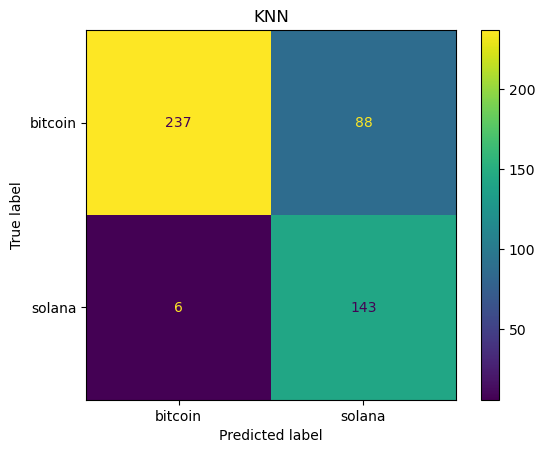

In [130]:
ConfusionMatrixDisplay.from_estimator(best_estimator_knn, y_test, y_pred_knn)
plt.title('KNN');

Logistic Regression with TfidfVectorizer

In [134]:
lt_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression())  
])

In [135]:
lt_params = { 
    'tfidf__max_features': [500,1000,1500],
    'tfidf__ngram_range': [(1,1),(1,2)],
    'logreg__C': [0.001,0.01,0.1,1]
}

In [136]:
grid_lt = GridSearchCV(lt_pipe, lt_params, n_jobs = -1)

In [137]:
grid_lt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1],
                         'tfidf__max_features': [500, 1000, 1500],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

In [138]:
best_params_lt = grid_lt.best_params_
best_params_lt

{'logreg__C': 1, 'tfidf__max_features': 1500, 'tfidf__ngram_range': (1, 2)}

In [139]:
best_estimator_lt = grid_lt.best_estimator_
best_estimator_lt

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1500, ngram_range=(1, 2))),
                ('logreg', LogisticRegression(C=1))])

In [140]:
log_train_score = best_estimator_lt.score(X_train, y_train)
log_train_score

0.988036593947924

In [141]:
log_test_score = best_estimator_lt.score(X_test, y_test)
log_test_score

0.959915611814346

In [92]:
y_pred_lt = best_estimator_lt.predict(X_test)

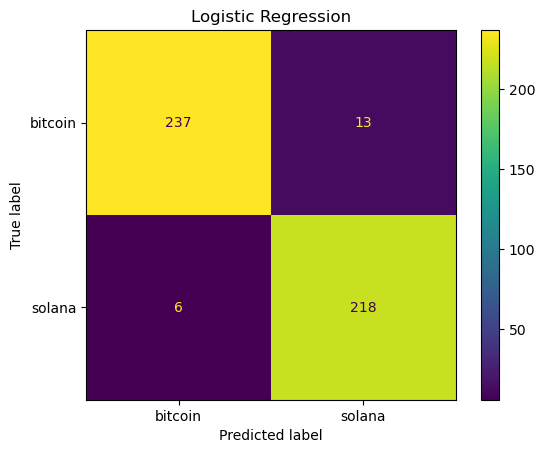

In [128]:
ConfusionMatrixDisplay.from_estimator(best_estimator_lt, y_test, y_pred_lt)
plt.title('Logistic Regression');


Naive Bayes with TfidfVectorizer

In [94]:
bayes_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('bayes',  MultinomialNB())  
])

In [95]:
params_bayes = {
    'tfidf__max_features': [500,1000,1500],
    'tfidf__ngram_range': [(1,1),(1,2)],
    'bayes__alpha': [0.1, 0.5, 1.0]
}

In [96]:
grid_bayes = GridSearchCV(bayes_pipe, params_bayes, n_jobs = -1)

In [97]:
grid_bayes.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('bayes', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'bayes__alpha': [0.1, 0.5, 1.0],
                         'tfidf__max_features': [500, 1000, 1500],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

In [98]:
best_params_bayes = grid_bayes.best_params_
best_params_bayes

{'bayes__alpha': 1.0,
 'tfidf__max_features': 1500,
 'tfidf__ngram_range': (1, 1)}

In [99]:
best_estimator_bayes = grid_bayes.best_estimator_
best_estimator_bayes

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1500)),
                ('bayes', MultinomialNB())])

In [100]:
bayes_train_score = best_estimator_bayes.score(X_train, y_train)
bayes_train_score

0.976073187895848

In [101]:
bayes_test_score = best_estimator_bayes.score(X_test, y_test)
bayes_test_score

0.9409282700421941

In [102]:
y_pred_bayes = best_estimator_bayes.predict(X_test)

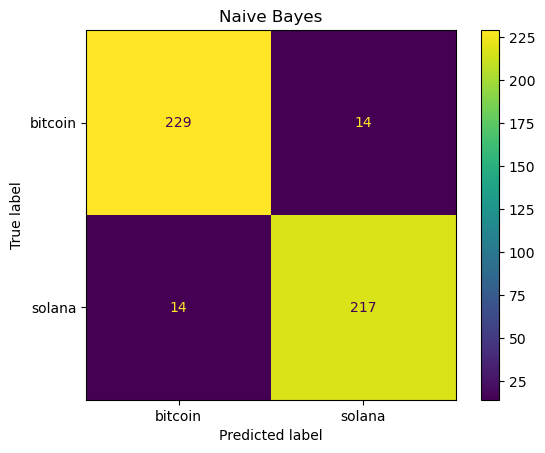

In [131]:
ConfusionMatrixDisplay.from_estimator(best_estimator_bayes, y_test, y_pred_bayes)
plt.title('Naive Bayes');

Random Forest with TfidfVectorizer

In [104]:
forest_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('forest', RandomForestClassifier())
])

In [105]:
params_forest = {
    'tfidf__max_features': [500,1000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'forest__n_estimators': [50, 100, 150],
    'forest__max_depth': [None, 10, 20, 30]
}

In [106]:
grid_forest = GridSearchCV(forest_pipe, params_forest, n_jobs = -1)

In [107]:
grid_forest.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('forest', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'forest__max_depth': [None, 10, 20, 30],
                         'forest__n_estimators': [50, 100, 150],
                         'tfidf__max_features': [500, 1000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]})

In [108]:
best_params_forest = grid_forest.best_params_
best_params_forest

{'forest__max_depth': 30,
 'forest__n_estimators': 100,
 'tfidf__max_features': 500,
 'tfidf__ngram_range': (1, 1)}

In [109]:
best_estimator_forest = grid_forest.best_estimator_
best_estimator_forest

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=500)),
                ('forest', RandomForestClassifier(max_depth=30))])

In [110]:
forest_train_score = best_estimator_forest.score(X_train, y_train)
forest_train_score

0.9817030260380014

In [111]:
forest_test_score = best_estimator_forest.score(X_test, y_test)
forest_test_score

0.9345991561181435

In [112]:
y_pred_forest = best_estimator_forest.predict(X_test)

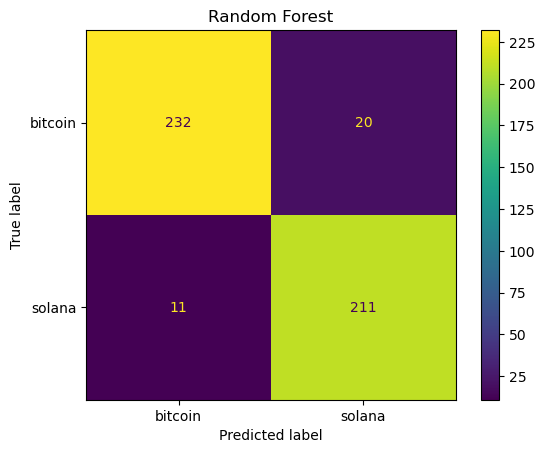

In [132]:
ConfusionMatrixDisplay.from_estimator(best_estimator_forest, y_test, y_pred_forest)
plt.title('Random Forest');

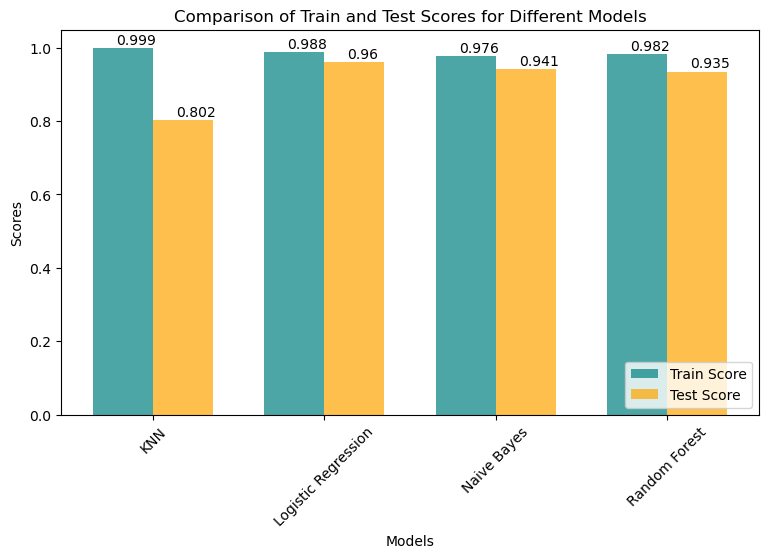

In [133]:
# Scores for all the models 
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest']
train_scores = [knn_train_score, log_train_score, bayes_train_score, forest_train_score]
test_scores = [knn_test_score, log_test_score, bayes_test_score, forest_test_score]

# plotting scores for train and test for the t
plt.figure(figsize=(9, 5))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, train_scores, bar_width, color='teal', alpha=0.7, label='Train Score')
plt.bar(index + bar_width, test_scores, bar_width, color='orange', alpha=0.7, label='Test Score')

# add scores on top of bars 
for i in range(len(models)):
    plt.text(index[i] - 0.04, train_scores[i] + 0.01, str(round(train_scores[i], 3)), color='black')
    plt.text(index[i] + bar_width - 0.04, test_scores[i] + 0.01, str(round(test_scores[i], 3)), color='black')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Train and Test Scores for Different Models')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend(loc = 'lower right');

KNN model is the most overfit of the models. The other three models also demonstrates a slight tendency towards overfitting, with Logistic Regression displaying a marginally stronger performance compared to the others.

### Which comments is the selected Logistic Regression model predicting incorrectly? 

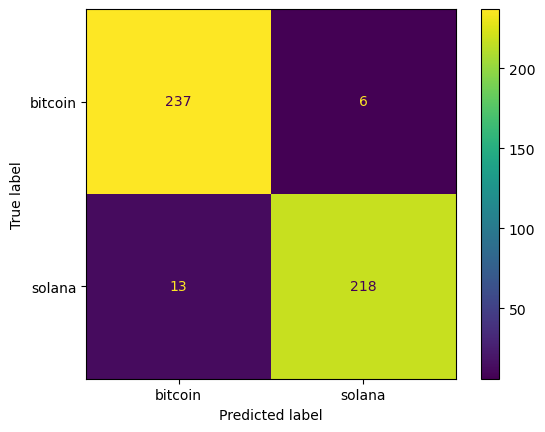

In [115]:
ConfusionMatrixDisplay.from_estimator(best_estimator_lt, X_test, y_test);

In [116]:
# re-run the Logistic Regressor model prior to running lines below

In [117]:
results_df = pd.DataFrame({'Text': X_test, 'True_Label': y_test, 'Predicted_Label': y_pred_lt})

In [118]:
# filter out misclassified comments
misclassified = results_df[results_df['True_Label'] != results_df['Predicted_Label']]
misclassified

,Text,True_Label,Predicted_Label
686,meme ask meme x200b ill awhile think well form...,bitcoin,solana
1690,solchat make significant progress sleep giant ...,solana,bitcoin
988,solana bitcoin moment well 384 solana bitcoin,solana,bitcoin
1675,handle success face loser person name rowdeeki...,solana,bitcoin
1619,birdseye way change email delete account need ...,solana,bitcoin
360,find token grandparent safety deposit box hell...,bitcoin,solana
759,solo pool puzzle 66 share effort hi like know ...,bitcoin,solana
1613,guy finally attempt countless hour spend refre...,solana,bitcoin
602,unconfirmed rbf transaction wait day hi transa...,bitcoin,solana
1074,happen curious cause message,solana,bitcoin


In [119]:
# print out misclassified comments 
for index, row in misclassified.iterrows():
    print("True Label:", row['True_Label'])
    print("Predicted Label:", row['Predicted_Label'])
    print("Text:", row['Text'])
    print("\n")

True Label: bitcoin
Predicted Label: solana
Text: meme ask meme x200b ill awhile think well format use enjoy


True Label: solana
Predicted Label: bitcoin
Text: solchat make significant progress sleep giant version solchat dapp come ready announce significant partnership prepare phase big news cex listing pipeline check roadmap mention staking come buy chat consolidate leg


True Label: solana
Predicted Label: bitcoin
Text: solana bitcoin moment well 384 solana bitcoin


True Label: solana
Predicted Label: bitcoin
Text: handle success face loser person name rowdeekid understand like mountain cash spend explain nicely peak age 19 net worth worried advice pray


True Label: solana
Predicted Label: bitcoin
Text: birdseye way change email delete account need delete birdseye account help give lot anxiety stress


True Label: bitcoin
Predicted Label: solana
Text: find token grandparent safety deposit box hello find token grandparent safety deposit box grandfather pass grandma want know value

For the comments that have both the word Solana and Bitcoin, the model tends to predict Bitcoin. Further refining of the model might aid in filtering out Solana-specific platforms/issues and prevent from skewing our model towards Bitcoin. 